In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#Loading the image
image = cv2.imread(r'C:\Users\Mr. Ghori\Image-Processing-using-OpenCV2\images\apple.png')

In [31]:
#Converting BGR Image into HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #Converts BGR image into HSV image

In [32]:
#Declare the ranges for the specific color to detect on the screen
lower_red = np.array([0,45,0]) #Minimum red range
upper_red = np.array([200,255,255]) #Maximum red range

In [33]:
#Creating mask for the detection of the object
mask = cv2.inRange(hsv_image, lower_red, upper_red) 

#cv.inRange(image_obj, initial range, final range) #Creates a boolean array containing 1 if pixel of image_obj in given range otherwise 0

In [34]:
outfile = cv2.bitwise_and(image, image, mask=mask)
#Displays those frame pixels that are in the mask as well

In [35]:
#Suppose we want to remove the noise from a picture. Unlike this case in which the picture is perfectly clear in most cases other elements also show up.
#These methods to remove noise from the obtained image is known as "Low Pass Filteration" and is performed by Low Pass Filters (LPFs)
#Some filters for image filteration(noise elimination) are stated below:

#1. Convolution Filter
#2. Mean Filter
#3. Gaussian Filter
#4. Median Filter

In [57]:
#2D Convolution Filter
#Convolution filter allows to convolve a kernel into an image. The kernel is specified with a particular size of pixels and is passed with all 1s in it.
#Suppose we want to create a convolution filter of 16 pixels, then we would consider kernel matrix as 3x3 and take their average by dividing each value by 9.

kernel = np.ones((3,3), dtype = np.float32)/9

#The 2D-filter is used to filter the given detection image by convoluting the kernel in it
conv_filter_img = cv2.filter2D(outfile, -1, kernel)
#cv2.filter2d(image_obj, depth_value, kernel_obj)

In [72]:
#Displaying the images function
def display_images(imgs, titles, num):
    '''
        Takes as arguments:
            imgs: Array of images to be displayed
            titles: Array of title names of images to be displayed
            num: Number of images/titles in the array
            
        The function displays the images with their titles passed as arguments
    '''
    for i in range(num):
        plt.subplot(1,num,i+1)
        plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)) #Since the obtained image is in BGR mode
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

    plt.show()

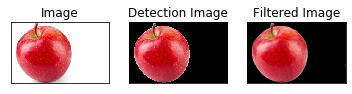

In [73]:
#Displaying the images
images = [image, outfile, conv_filter_img]
titles = ['Image', 'Detection Image', 'Filtered Image']
display_images(images, titles, 3)

In [74]:
#Mean Filter
#Mean filter allows to take the average of the pixels in the kernel size given to it and replaces the central element with this average

mean_filter_img = cv2.blur(outfile, (3,3)) #Alternative function is cv2.boxFilter()
#cv2.meanBlur(image_obj, kernel_size)

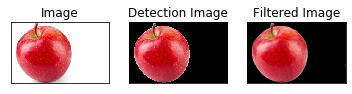

In [75]:
#Displaying the images
images = [image, outfile, mean_filter_img]
titles = ['Image', 'Detection Image', 'Filtered Image']
display_images(images, titles, 3)

In [76]:
#Gaussian Filter
#Gaussian filter allows to remove gaussian noise from a certain image.It uses a Gaussian kernel instead of a box filter

gauss_filter_img = cv2.GaussianBlur(outfile, (3,3), 0)
#cv2.GaussianBlur(image_obj, gaussian_kernel_size, gaussian_deviation_along_X)

#We want to calculate the blur image using the kernel size thus we will take deviation value as 0

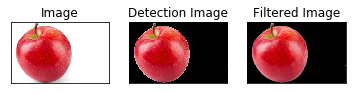

In [77]:
#Displaying the images
images = [image, outfile, gauss_filter_img]
titles = ['Image', 'Detection Image', 'Filtered Image']
display_images(images, titles, 3)

In [78]:
#Median Filter
#Median filter allows to remove salt and pepper noise from the detected image by using the median of all pixels under the kernel window

#First lets add some salt and pepper noise to our object

def add_salt_and_pepper(gb, prob):
    
    rnd = np.random.rand(gb.shape[0], gb.shape[1]) #Creating random noise values between 0 and 1
    noisy = gb.copy() #Copy the layout of the provided array
    noisy[rnd < prob] = 0 #All values less than threshold of noise converted to 0
    noisy[rnd > 1 - prob] = 1 #All values greater than threshold or equal to are converted to 1
    return noisy #The returned array contains the noise of the images

In [86]:
#To add the noise, we need a 1 channel object thus, we should convert it into grayscale value
gray_img = cv2.cvtColor(outfile, cv2.COLOR_BGR2GRAY)
noise_img = add_salt_and_pepper(gray_img, 0.1) #Obtained the noise image

In [87]:
#Now applying the median filter on the noise image
median_filter_img = cv2.medianBlur(noise_img, 3)
#cv2.medianBlur(image_obj, kernel_size)

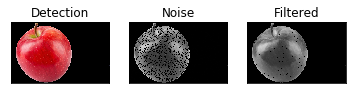

In [89]:
#Now displaying images
images = [outfile, noise_img, median_filter_img]
titles = ['Detection','Noise', 'Filtered']
display_images(images, titles, 3)